# 負の二項分布でエンゼルがN回目で出てくる確率を予測する

In [1]:
import sys, os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
def getExpectPoint(p, n, ks, f_name=None):
    """
    Args:
        p : 成功確率
        n : 成功数
        ks : 失敗回数(リスト)
    """
    pmf_expect = stats.nbinom.pmf(ks, n, p)
    cdf_expect = pmf_expect.cumsum()
    
    first_over_50 = list(cdf_expect).index(cdf_expect[cdf_expect>0.5].min())
    print("50% Over : ", first_over_50)
    
    fig = plt.figure(figsize=(13, 4))
    ax = fig.subplots(1, 2)
    
    ax[0].plot(ks, pmf_expect)
    ax[0].set_title('Probability Mass Function')
    ax[0].set_xlabel('False Count')
    ax[0].set_ylabel('Probability Mass')
    ax[1].plot(ks, cdf_expect)
    ax[1].set_title('Cumulative Probability Mass Function')
    ax[1].set_xlabel('False Count')
    ax[1].set_ylabel('Cum. Probability')
    ax[1].set_ylim([0.0, 1.0])
    ax[1].vlines(x=first_over_50, ymin=0, ymax=1.0, color="red", label="50% Over")
    if f_name is not None:
        fig.savefig(f_name)
    return {'ks':ks, 'pmf':pmf_expect, 'cdf':cdf_expect}

- 2018/08/03時点で、174箱の計測数で8個のエンゼル
- 次にエンゼルが現れるのはいつか?をしりたい
- 確率pだと仮定して、次(175箱目)にエンゼルが現れる確率は?

50% Over :  165


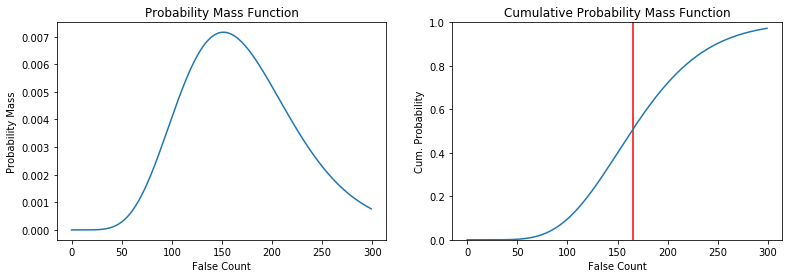

In [7]:
p = 0.05 # 5%
n = 9
ks = np.arange(0,300,1)

ret = getExpectPoint(p, n, ks)
df_result = pd.DataFrame(ret)[['ks', 'pmf', 'cdf']]

In [9]:
df_result[df_result['ks']==166]

,ks,pmf,cdf
166,166,0.006931,0.513583


- 2018/08/03現在、38連続で外している
- 確率pだと仮定して、次にエンゼルが現れる確率は?

50% Over :  13


,ks,pmf,cdf
38,38,0.00712,0.864724


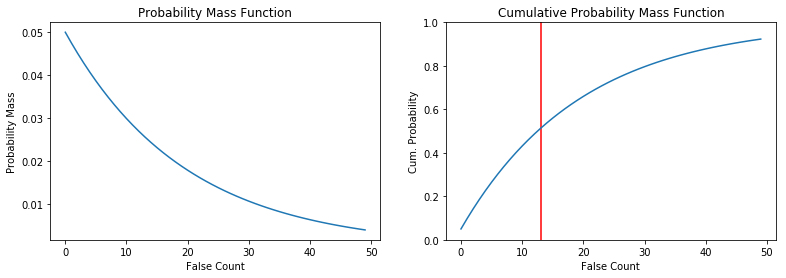

In [5]:
p = 0.05 # 5%
n = 1
ks = np.arange(0,50,1) # 失敗回数

ret = getExpectPoint(p, n, ks)
df_result = pd.DataFrame(ret)[['ks', 'pmf', 'cdf']]
df_result[df_result['ks']==38]